In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #This class is used to scale (normalize) data to a specified range, typically between 0 and 1 or -1 and 1.
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout #A type of Recurrent Neural Network (RNN) layer, which is suitable for sequential data (e.g., time series). # A fully connected layer in a neural network, where each input is connected to every output neuron. #A regularization technique that randomly disables some neurons during training to prevent overfitting.
import math #provides mathematical functions like square root, trigonometric functions, and more.

In [ ]:
df = pd.read_csv("stock_prices.csv")  # Ensure the CSV has a 'Close' column
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date']) # Converts the 'Date' column into a datetime format.
df.set_index('Date', inplace=True) # Sets the 'Date' column as the index of the DataFrame.
df.sort_index(inplace=True) # Sorts the DataFrame by the index (which is now 'Date'), in ascending order.

In [ ]:
# 📊 Preprocess Data
data = df['Close'].values.reshape(-1, 1) # takes the 'Close' column and reshape tha array into a 2D array with one column
scaler = MinMaxScaler(feature_range=(0, 1)) # Creates an instance of the MinMaxScaler with a feature range of 0 to 1.
scaled_data = scaler.fit_transform(data) # Fits the scaler to the data
training_data_len = int(len(scaled_data) * 0.8) # Calculates the number of data points to use for training.
                                                # len(scaled_data) gives the total number of rows in the data.
                                                #  Multiplying by 0.8 (80%) ensures 80% of the data will be used for training, and the remaining 20% will be used for testing or validation.
train_data = scaled_data[:training_data_len] # Selects the first 80% of scaled_data (rows from the start up to training_data_len) as train_data.

In [ ]:
x_train, y_train = [], []
for i in range(60, len(train_data)): # Starts at index 60 and goes to the end of the train_data. # Why start at 60? Because each input (x_train) requires the previous 60 data points.
    x_train.append(train_data[i-60:i, 0]) # Takes a slice of 60 consecutive rows from train_data (from i-60 to i, not including i) and appends it to x_train.
    y_train.append(train_data[i, 0]) # Appends the value at position i (the next data point) to y_train.
x_train, y_train = np.array(x_train), np.array(y_train) # Converts the x_train and y_train lists into NumPy arrays.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1) # Reshapes x_train into a 3D array with the shape: 1.x_train.shape[0]: Number of samples 2. x_train.shape[1]: Number of timesteps in each sequence 3. 1: Number of features in each timestep

In [ ]:
# 🧠 Build RNN Model
model = Sequential() # Creates a sequential model, which is a linear stack of layers.
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1))) # units=50: The layer has 50 neurons, which is the dimensionality of the output space. # return_sequences=False: The RNN outputs only the last timestep's result (not the entire sequence). # input_shape=(x_train.shape[1], 1):
                                                                                          # x_train.shape[1]: Specifies the number of timesteps in each input sequence (60 in this case).
                                                                                          # 1: Specifies the number of features in each timestep (here, we have only 1 feature: the scaled closing price).
model.add(Dropout(0.2)) # Adds a Dropout layer, which randomly sets 20% of the neurons to zero during each training iteration.
model.add(Dense(1)) # Adds a Dense (fully connected) layer with 1 output neuron.
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 🔁 Train the Model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3374
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0332
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0212
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0145
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0129
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0121
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0104
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0083
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0080
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0062
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0078
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0068
Epoc

In [ ]:
# 📈 Prepare Test Data
test_data = scaled_data[training_data_len - 60:] # Takes the last part of the scaled_data array starting from 60 data points before the end of the training data.
x_test = [] # Initializes an empty list called x_test.
y_test = data[training_data_len:] # Extracts the actual stock prices (from the original data array) starting from the point where the training data ends (training_data_len).
for i in range(60, len(test_data)): # Loops through test_data, starting from the 60th index.
    x_test.append(test_data[i-60:i, 0]) # For each index i, it takes a sequence of 60 previous stock prices (from index i-60 to i-1) and appends this sequence to x_test.
x_test = np.array(x_test) # Converts x_test from a list to a NumPy array.
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1) # Reshapes the x_test array to a 3D array with the shape (samples, timesteps, features).

In [ ]:
# 🔮 Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
# 📉 Evaluate the Model
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse) # The square root function is applied to the MSE. # It prints out the RMSE value, which tells you how well your model's predictions match the actual data.

Root Mean Squared Error: 5.035698040590398


In [ ]:
# 📊 Plot Results
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions # This line creates a new column in the valid DataFrame called Predictions.

<ipython-input-22-ed5d01c3c3fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


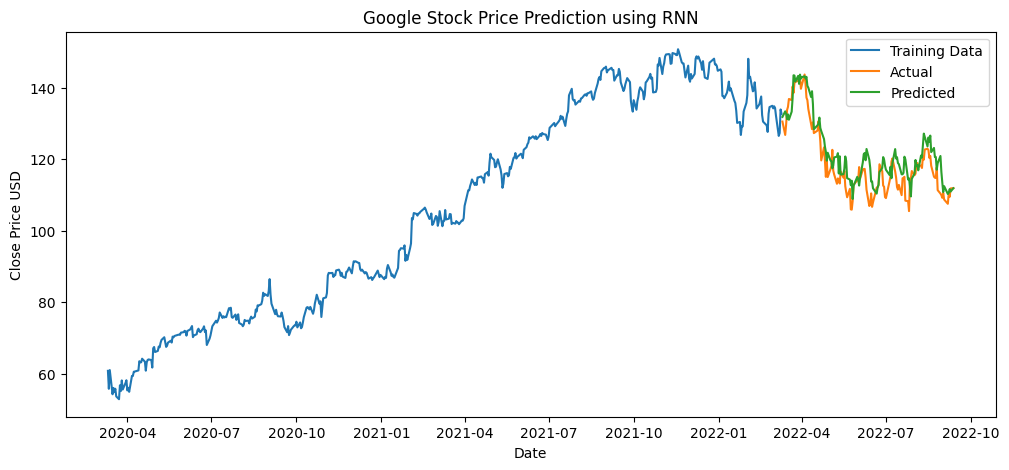

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'], label='Training Data') # Plots the training data (the actual stock prices for the training set) as a line graph.
plt.plot(valid[['Close', 'Predictions']], label=['Actual', 'Predicted']) # Plots both the actual stock prices and the predicted stock prices for the test data (valid).
plt.legend() # Displays a legend on the plot to differentiate between the "Training Data", "Actual", and "Predicted" lines.
plt.show()